In [1]:
# 국가공간정보포털 | http://www.nsdi.go.kr/lxportal/
# 공간기반 동물병원 정보 | http://data.nsdi.go.kr/dataset/14739

In [13]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
# Pandas(Python Data Analysis Library) 설치 | https://pandas.pydata.org/
!pip install pandas

  Using cached pandas-0.25.3-cp35-cp35m-win_amd64.whl (8.8 MB)
  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)


In [5]:
# Seaborn(statistical data visualization) 설치 | https://seaborn.pydata.org/
!pip install seaborn

  Using cached seaborn-0.9.1-py2.py3-none-any.whl (216 kB)
  Using cached scipy-1.4.1-cp35-cp35m-win_amd64.whl (30.8 MB)
  Using cached matplotlib-3.0.3-cp35-cp35m-win_amd64.whl (9.1 MB)
  Using cached kiwisolver-1.1.0-cp35-none-win_amd64.whl (57 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [9]:
# '동물병원' 데이터프레임 열기
df = pd.read_excel('D:/GEODATA/AML_HOSP.xlsx', sheet_name='AML_HOSP',
                   index_col='인허가일자', parse_dates=True, axis=1)
df.head()

,번호,사업장명,소재지전체,도로명전체,영업상태명,폐업일자,재개업일자,소재지면적,축산업무구,xcoord,ycoord,NAME
인허가일자,,,,,,,,,,,,
2013-07-15,2,(주)다솜동물병원,부산광역시 남구 문현동 403-7번지 1층,"부산광역시 남구 수영로13번길 3, 1층 (문현동)",운영중,NaN,NaN,301.59,동물병원,129.069276,35.137447,Busan
2003-07-23,10,(주)아이러브 팻,부산광역시 남구 문현동 751번지,NaN,폐업 등,20050401.0,NaN,8351.59,동물병원,129.064261,35.144327,Busan
2002-12-21,44,21세기종합동물병원,부산광역시 북구 덕천동 383-3 번지,NaN,운영중,NaN,NaN,0.00,동물병원,129.008790,35.210714,Busan
1992-10-19,75,24시 토곡동물병원,부산광역시 연제구 연산동 399-12번지,부산광역시 연제구 과정로 234-1 (연산동),폐업 등,20140430.0,20140430.0,0.00,동물병원,129.101617,35.187885,Busan
2003-02-05,91,24시동물병원,부산광역시 동래구 사직동 100-3번지,부산광역시 동래구 아시아드대로 131 (사직동),폐업 등,20080811.0,NaN,0.00,동물병원,129.065587,35.196059,Busan


In [8]:
# xlrd 설치
!pip install xlrd

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)


In [10]:
# '동물병원' 데이터프레임에서 컬럼 선별하기
df = pd.read_excel('D:/GEODATA/AML_HOSP.xlsx', sheet_name='AML_HOSP',
                   index_col='인허가일자', parse_dates=True, axis=1)[['사업장명', 'NAME']]
df.columns = ['사업장명', 'name']
df.head()

,사업장명,name
인허가일자,,
2013-07-15,(주)다솜동물병원,Busan
2003-07-23,(주)아이러브 팻,Busan
2002-12-21,21세기종합동물병원,Busan
1992-10-19,24시 토곡동물병원,Busan
2003-02-05,24시동물병원,Busan


In [11]:
# 연도별 통계
df[['사업장명']].groupby(df.index.year).count().head()

,사업장명
인허가일자,
1958,2
1961,4
1962,1
1963,5
1964,8


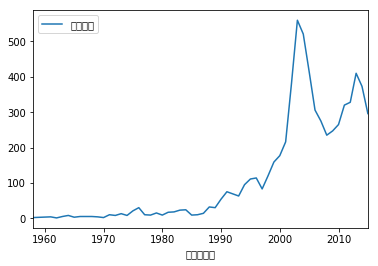

In [12]:
# 연도별 통계 플롯
df[['사업장명']].groupby(df.index.year).count().plot()

In [16]:
# 폰트매니저
# http://www.kopus.org/Biz/electronic/Font2.aspx
fm._rebuild()
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'KoPub' in f.name]

[('KoPubDotum', 'C:\\Windows\\Fonts\\KoPub Dotum Light.ttf'),
 ('KoPubBatang', 'C:\\Windows\\Fonts\\KoPub Batang Bold.ttf'),
 ('KoPubBatang', 'C:\\Windows\\Fonts\\KoPub Batang Light.ttf'),
 ('KoPubDotum', 'C:\\Windows\\Fonts\\KoPub Dotum Bold.ttf'),
 ('KoPubDotum', 'C:\\Windows\\Fonts\\KoPub Dotum Medium.ttf'),
 ('KoPubBatang', 'C:\\Windows\\Fonts\\KoPub Batang Medium.ttf')]

In [17]:
# Seaborn 스타일, 폰트, 폰트 축척 설정
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.5)

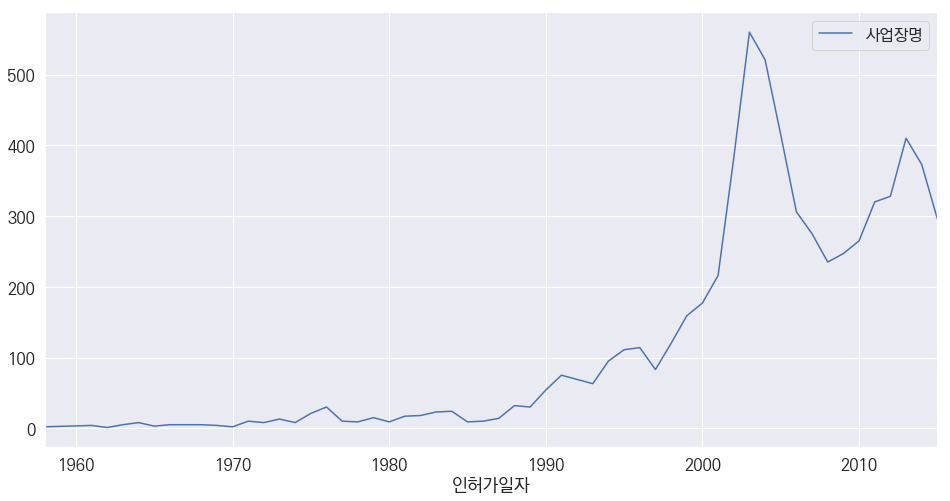

In [18]:
# 연도별 통계 플롯(플롯 크기 설정)
df[['사업장명']].groupby(df.index.year).count().plot(figsize=(16, 8))

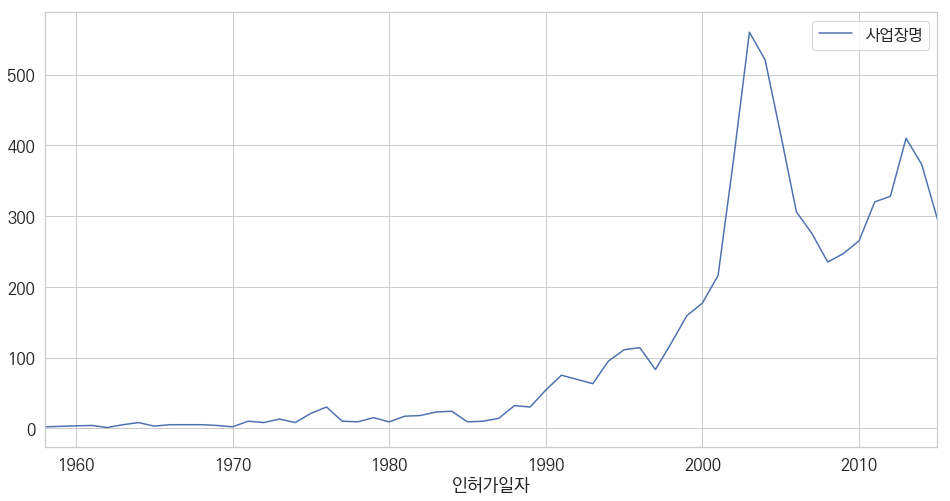

In [19]:
# Seaborn 스타일 변경 적용 후 이미지로 저장
sns.set(style='whitegrid', font='KoPubDotum', font_scale=1.5)
df[['사업장명']].groupby(df.index.year).count().plot(figsize=(16, 8))
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

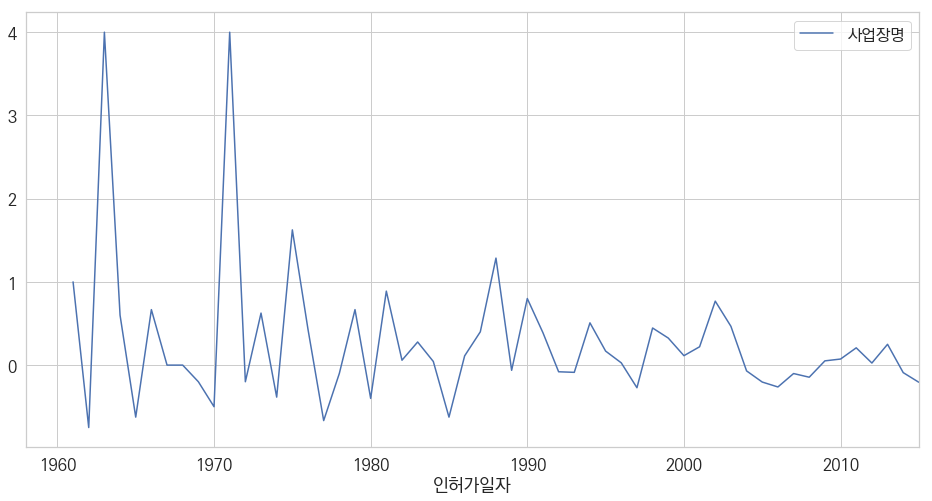

In [20]:
# 퍼센트 변화(percent change) 플롯
df[['사업장명']].groupby(df.index.year).count().pct_change().plot(figsize=(16, 8))
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')